# Building A Logistic Regression in Python, Step by Step

Logistic Regression is a machine Learning classification algorithm that is used to predict the probability of a categorical dependant var.

In Logistic Regression, the dependant var is a binary var that. contains data coded as '1'(yes, success, etc..) or '0'(no, failure, etc..) in other words the Logistic Regression model predicts P(Y=1) as a function of X.

## Logistic Regression Assumptions

1> Binary logistic regression requires the dependant var to be binary.

2> For a binary regression, the factor level 1 if the dependant var should represent the desired outcome.

3> Only the meaningful var should be included.

4> The independant var should be independant of each other. That is, the model should have little or no multi-collinearity.

5> The independant var are linearly related to the log odds.

6> Logistic regression requires quite large sample sizes

### Problem: The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portugese banking institution.

The classification goal is to predict whether the client will subscribe (1/0) to a deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [2]:
pwd

'e:\\porutkaL\\GitHub\\Verzeo\\Artificial Intelligence\\Supervised&Unsupervised\\linear_Regression'

##Data Exploration

In [23]:
data = pd.read_csv('bank.csv', header=0)

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [7]:
data.tail(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
print(data.shape)

(4521, 17)


### Barplot for dependant Var

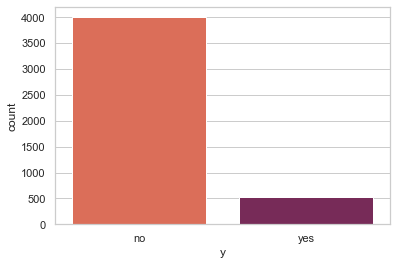

In [14]:
sns.countplot(x='y', data=data, palette='rocket_r')
plt.show()

### Check for missing values

In [11]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Customer Job Distribution

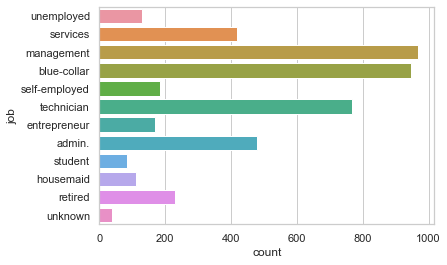

In [15]:
sns.countplot(y='job', data=data)
plt.show()

### Customer Marital Status

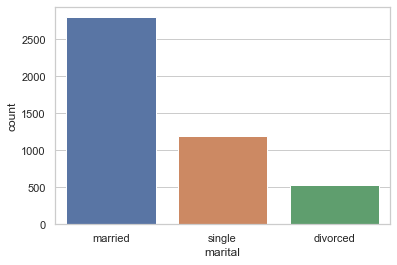

In [17]:
sns.countplot(x='marital', data=data)
plt.show()

### Customer Housings

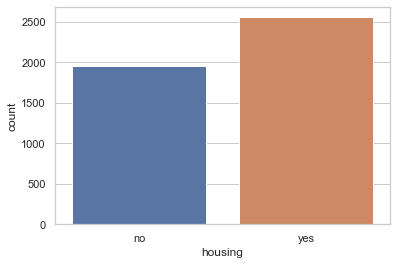

In [18]:
sns.countplot(x='housing', data=data)
plt.show()

### Customer Loan Status

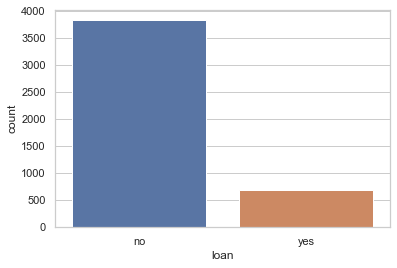

In [19]:
sns.countplot(x='loan', data=data)
plt.show()

### Customer Previous marketing Outcome Distribution

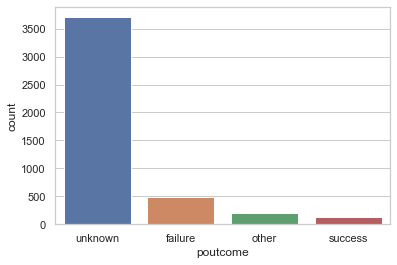

In [20]:
sns.countplot(x='poutcome', data=data)
plt.show()

Our prediction will be based on customer's job, marital status, whether he(she) has credit in default, housing loan, personal loan, and the outcome of the previous marketing campaigns. So, we'll drop the var not needed/take only the needed var.

In [24]:
data.drop(data.columns[[0,3,5,8,9,10,11,12,13,14]], axis=1, inplace=True)
# data = data[['job', 'marital', 'default', 'housing', 'loan', 'poutcome']]

## Data Preprocessing

Create dummy vars, (i.e) var with only two vals {'no': 0, 'yes': 1}

In logistic Regress mpdels, encoding all of the independant vars as dummy vars allows easy interpretation and calculation of the odds ratios, and increases teh stability and significance of the coefficients.

In [32]:
data1 = pd.get_dummies(data, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

data1

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,no,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
2,no,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0
3,no,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,no,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,no,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
4517,no,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
4518,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4519,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0


In [33]:
data1.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

## Drop the unknown outcomes

In [34]:
data1.drop(data1.columns[[12, 25]], axis=1, inplace=True)
data1.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

## Check the independence between independant vars

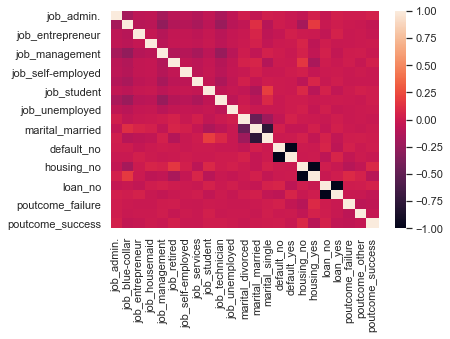

In [37]:
sns.heatmap(data1.corr())
plt.show()

## Split the data into training and test sets

In [38]:
X = data1.iloc[:, 1:]
y = data1.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Check out whether training data is sufficient

In [39]:
X_train.shape

(3390, 23)

## Logistic Regression Model

## Fit logistic regression to the training set

In [40]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the test set results and creating confusion matrix 

The confusion_matrix() function will calc a confusion matrix and ret the result as an arr.

In [49]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

print(f"The result is telling that we have {confusion_matrix[0,0]}(+ve)+{confusion_matrix[1,1]}(-ve) correct predictions and {confusion_matrix[0,1]}(+ve)+{confusion_matrix[1,0]}(-ve) incorrect predictions.")

[[990   3]
 [120  18]]
The result is telling that we have 990(+ve)+18(-ve) correct predictions and 3(+ve)+120(-ve) incorrect predictions.


## Accuracy

In [50]:
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


## Compute precision, recall, F-measure and support

The precision is the ratio ( tp / (tp + fp) ) where 'tp' is the no.of true +ves and fp is the no. of false +ves. The precision is intuitivelly the ability of the classifier to not label a sample as +ve if it is negative.
The recall is the ratio ( tp / (tp + fn) ) where 'tp' = no. of true +ves and 'fn' = no.of false -ves. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at '1' and worst value at '0'.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

          no       0.89      1.00      0.94       993
         yes       0.86      0.13      0.23       138

    accuracy                           0.89      1131
   macro avg       0.87      0.56      0.58      1131
weighted avg       0.89      0.89      0.85      1131



### Interpretation: Of the entire test set, ?% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, ??% of the customer's preferred term deposits that were promoted.

For further ref: https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/